<a href="https://colab.research.google.com/github/SanghunOh/with_data_analytics/blob/main/codes/%EC%97%B0%EB%A0%B9%EB%B3%84%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###from https://jumin.mois.go.kr/index.jsp > 정책자료 > 주민등록 인구통계 > 주민등록 인구 및 세대현황 -> 전체읍면동현황 (연령 구분 단위 : 1세, 만 연령구분 : 0 ~100)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [3]:
import pandas as pd
read_df = pd.read_csv('./202106_202106_연령별인구현황_월간.csv', encoding='cp949')

read_df

,행정구역,2021년06월_계_총인구수,2021년06월_계_연령구간인구수,2021년06월_계_0세,2021년06월_계_1세,2021년06월_계_2세,2021년06월_계_3세,2021년06월_계_4세,2021년06월_계_5세,2021년06월_계_6세,...,2021년06월_계_91세,2021년06월_계_92세,2021년06월_계_93세,2021년06월_계_94세,2021년06월_계_95세,2021년06월_계_96세,2021년06월_계_97세,2021년06월_계_98세,2021년06월_계_99세,2021년06월_계_100세 이상
0,서울특별시 (1100000000),"9,565,990","9,565,990","44,241","47,223","51,058","54,048","59,547","66,382","68,371",...,"7,977","6,783","5,094","3,764","2,535","1,776","1,374","1,368",831,"2,469"
1,서울특별시 종로구 (1111000000),"146,029","146,029",486,538,563,622,728,838,825,...,178,147,105,99,69,46,31,27,33,52
2,서울특별시 종로구 청운효자동(1111051500),"12,024","12,024",46,52,60,66,87,80,95,...,13,9,7,6,7,4,4,2,3,7
3,서울특별시 종로구 사직동(1111053000),"9,371","9,371",26,30,43,47,63,66,80,...,14,18,2,10,12,4,1,4,0,5
4,서울특별시 종로구 삼청동(1111054000),"2,498","2,498",10,5,5,11,10,12,12,...,9,1,4,3,1,2,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,제주특별자치도 서귀포시 서홍동(5013058000),"10,925","10,925",66,78,98,94,115,146,151,...,5,9,6,1,3,0,1,2,1,4
3843,제주특별자치도 서귀포시 대륜동(5013059000),"15,084","15,084",104,150,142,147,180,175,181,...,16,7,7,6,3,3,0,7,2,5
3844,제주특별자치도 서귀포시 대천동(5013060000),"13,865","13,865",103,121,132,164,202,188,200,...,19,4,12,5,6,1,2,1,4,3
3845,제주특별자치도 서귀포시 중문동(5013061000),"11,563","11,563",63,80,77,71,75,96,99,...,15,10,7,5,4,1,2,1,1,6


##데이터 정리

###컬럼명 정리

In [4]:
def replace_column_name(column_name, split_param='_'):
  split_list = column_name.split(split_param)
  result = split_list[len(split_list)-1]
  return result

In [5]:
read_df.columns = list(map(replace_column_name,list(read_df.columns)))

In [6]:
read_df

,행정구역,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
0,서울특별시 (1100000000),"9,565,990","9,565,990","44,241","47,223","51,058","54,048","59,547","66,382","68,371",...,"7,977","6,783","5,094","3,764","2,535","1,776","1,374","1,368",831,"2,469"
1,서울특별시 종로구 (1111000000),"146,029","146,029",486,538,563,622,728,838,825,...,178,147,105,99,69,46,31,27,33,52
2,서울특별시 종로구 청운효자동(1111051500),"12,024","12,024",46,52,60,66,87,80,95,...,13,9,7,6,7,4,4,2,3,7
3,서울특별시 종로구 사직동(1111053000),"9,371","9,371",26,30,43,47,63,66,80,...,14,18,2,10,12,4,1,4,0,5
4,서울특별시 종로구 삼청동(1111054000),"2,498","2,498",10,5,5,11,10,12,12,...,9,1,4,3,1,2,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,제주특별자치도 서귀포시 서홍동(5013058000),"10,925","10,925",66,78,98,94,115,146,151,...,5,9,6,1,3,0,1,2,1,4
3843,제주특별자치도 서귀포시 대륜동(5013059000),"15,084","15,084",104,150,142,147,180,175,181,...,16,7,7,6,3,3,0,7,2,5
3844,제주특별자치도 서귀포시 대천동(5013060000),"13,865","13,865",103,121,132,164,202,188,200,...,19,4,12,5,6,1,2,1,4,3
3845,제주특별자치도 서귀포시 중문동(5013061000),"11,563","11,563",63,80,77,71,75,96,99,...,15,10,7,5,4,1,2,1,1,6


In [7]:
read_df.columns

Index(['행정구역', '총인구수', '연령구간인구수', '0세', '1세', '2세', '3세', '4세', '5세', '6세',
       ...
       '91세', '92세', '93세', '94세', '95세', '96세', '97세', '98세', '99세',
       '100세 이상'],
      dtype='object', length=104)

In [8]:
#drop some columns
read_df.drop(columns=['총인구수', '연령구간인구수'], inplace=True)

###index 변경

In [9]:
read_df.set_index('행정구역', inplace=True)

In [10]:
read_df.dtypes

0세         object
1세         object
2세         object
3세         object
4세         object
            ...  
96세        object
97세        object
98세        object
99세         int64
100세 이상    object
Length: 101, dtype: object

In [11]:
(read_df.dtypes == 'int64').all()

False

In [12]:
type(read_df['99세'].dtype), read_df['99세'].dtype == 'object'

(numpy.dtype[int64], False)

In [13]:
change_dtype_columns = read_df.columns
for column in change_dtype_columns:
  if read_df[column].dtype == 'object':
    read_df[column] = read_df[column].str.replace(',','').astype('int64')
read_df  

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),44241,47223,51058,54048,59547,66382,68371,67142,71742,72772,...,7977,6783,5094,3764,2535,1776,1374,1368,831,2469
서울특별시 종로구 (1111000000),486,538,563,622,728,838,825,830,961,884,...,178,147,105,99,69,46,31,27,33,52
서울특별시 종로구 청운효자동(1111051500),46,52,60,66,87,80,95,86,94,107,...,13,9,7,6,7,4,4,2,3,7
서울특별시 종로구 사직동(1111053000),26,30,43,47,63,66,80,61,79,71,...,14,18,2,10,12,4,1,4,0,5
서울특별시 종로구 삼청동(1111054000),10,5,5,11,10,12,12,14,15,12,...,9,1,4,3,1,2,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주특별자치도 서귀포시 서홍동(5013058000),66,78,98,94,115,146,151,142,149,152,...,5,9,6,1,3,0,1,2,1,4
제주특별자치도 서귀포시 대륜동(5013059000),104,150,142,147,180,175,181,159,171,163,...,16,7,7,6,3,3,0,7,2,5
제주특별자치도 서귀포시 대천동(5013060000),103,121,132,164,202,188,200,189,162,170,...,19,4,12,5,6,1,2,1,4,3


In [14]:
(read_df.dtypes == 'int64').all()

True

##시도별 서브셋 만들기

In [15]:
administrative_df = read_df[read_df.index.str.contains('00000000')].copy()

In [16]:
administrative_df

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),44241,47223,51058,54048,59547,66382,68371,67142,71742,72772,...,7977,6783,5094,3764,2535,1776,1374,1368,831,2469
부산광역시 (2600000000),14124,16263,18046,20564,23055,25859,26621,25962,27396,27826,...,2934,2570,1949,1281,869,610,415,399,250,758
대구광역시 (2700000000),10436,12412,13718,15528,17629,19696,20287,19945,21185,21782,...,1908,1577,1221,863,549,408,249,218,158,369
인천광역시 (2800000000),14628,16493,18625,19698,22180,24792,25854,25195,26777,27666,...,2433,2094,1487,1170,774,618,376,408,240,538
광주광역시 (2900000000),7493,8222,9109,10276,11633,13141,13465,13553,14700,14831,...,1317,951,669,541,358,229,136,229,104,235
대전광역시 (3000000000),7256,7925,8921,9941,11244,12384,12937,12732,13472,13859,...,1186,1021,792,519,359,232,171,170,102,202
울산광역시 (3100000000),6075,6844,7591,8491,9642,10808,11165,11101,11538,11610,...,583,521,381,297,199,141,100,92,50,82
세종특별자치시 (3600000000),3370,3581,4162,4432,4756,5244,5392,5195,5403,5442,...,268,225,164,112,62,48,27,38,22,38
경기도 (4100000000),75664,84394,93287,101516,112705,126089,130224,126791,135146,137020,...,10728,8718,6550,4713,3310,2369,1716,1677,967,2311


In [17]:
administrative_df.index = administrative_df.index.str.split(' ').str[0]
administrative_df

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시,44241,47223,51058,54048,59547,66382,68371,67142,71742,72772,...,7977,6783,5094,3764,2535,1776,1374,1368,831,2469
부산광역시,14124,16263,18046,20564,23055,25859,26621,25962,27396,27826,...,2934,2570,1949,1281,869,610,415,399,250,758
대구광역시,10436,12412,13718,15528,17629,19696,20287,19945,21185,21782,...,1908,1577,1221,863,549,408,249,218,158,369
인천광역시,14628,16493,18625,19698,22180,24792,25854,25195,26777,27666,...,2433,2094,1487,1170,774,618,376,408,240,538
광주광역시,7493,8222,9109,10276,11633,13141,13465,13553,14700,14831,...,1317,951,669,541,358,229,136,229,104,235
대전광역시,7256,7925,8921,9941,11244,12384,12937,12732,13472,13859,...,1186,1021,792,519,359,232,171,170,102,202
울산광역시,6075,6844,7591,8491,9642,10808,11165,11101,11538,11610,...,583,521,381,297,199,141,100,92,50,82
세종특별자치시,3370,3581,4162,4432,4756,5244,5392,5195,5403,5442,...,268,225,164,112,62,48,27,38,22,38
경기도,75664,84394,93287,101516,112705,126089,130224,126791,135146,137020,...,10728,8718,6550,4713,3310,2369,1716,1677,967,2311


###다중플롯 시각화

In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [19]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

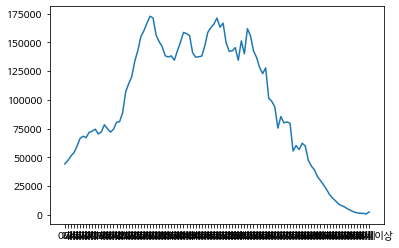

In [20]:
plt.plot(administrative_df.iloc[0])

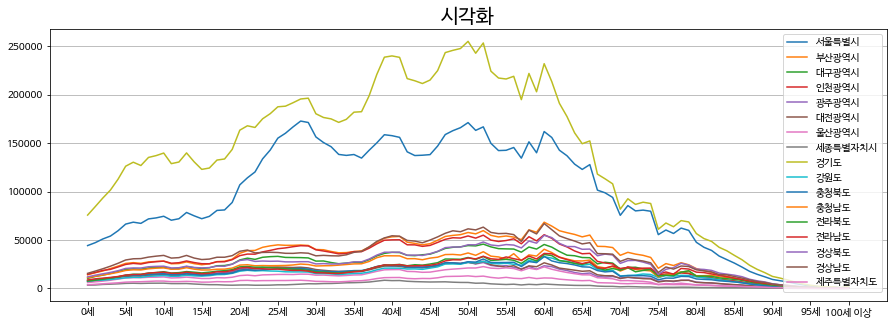

In [27]:
plt.rcParams['figure.figsize']=(15,5)
for index in range(len(administrative_df)):
  plt.plot(administrative_df.iloc[index], label=administrative_df.index[index])
plt.legend()
plt.xticks(range(0,101,5))
plt.title('시각화', size=20)
plt.grid(axis='y')
plt.show()

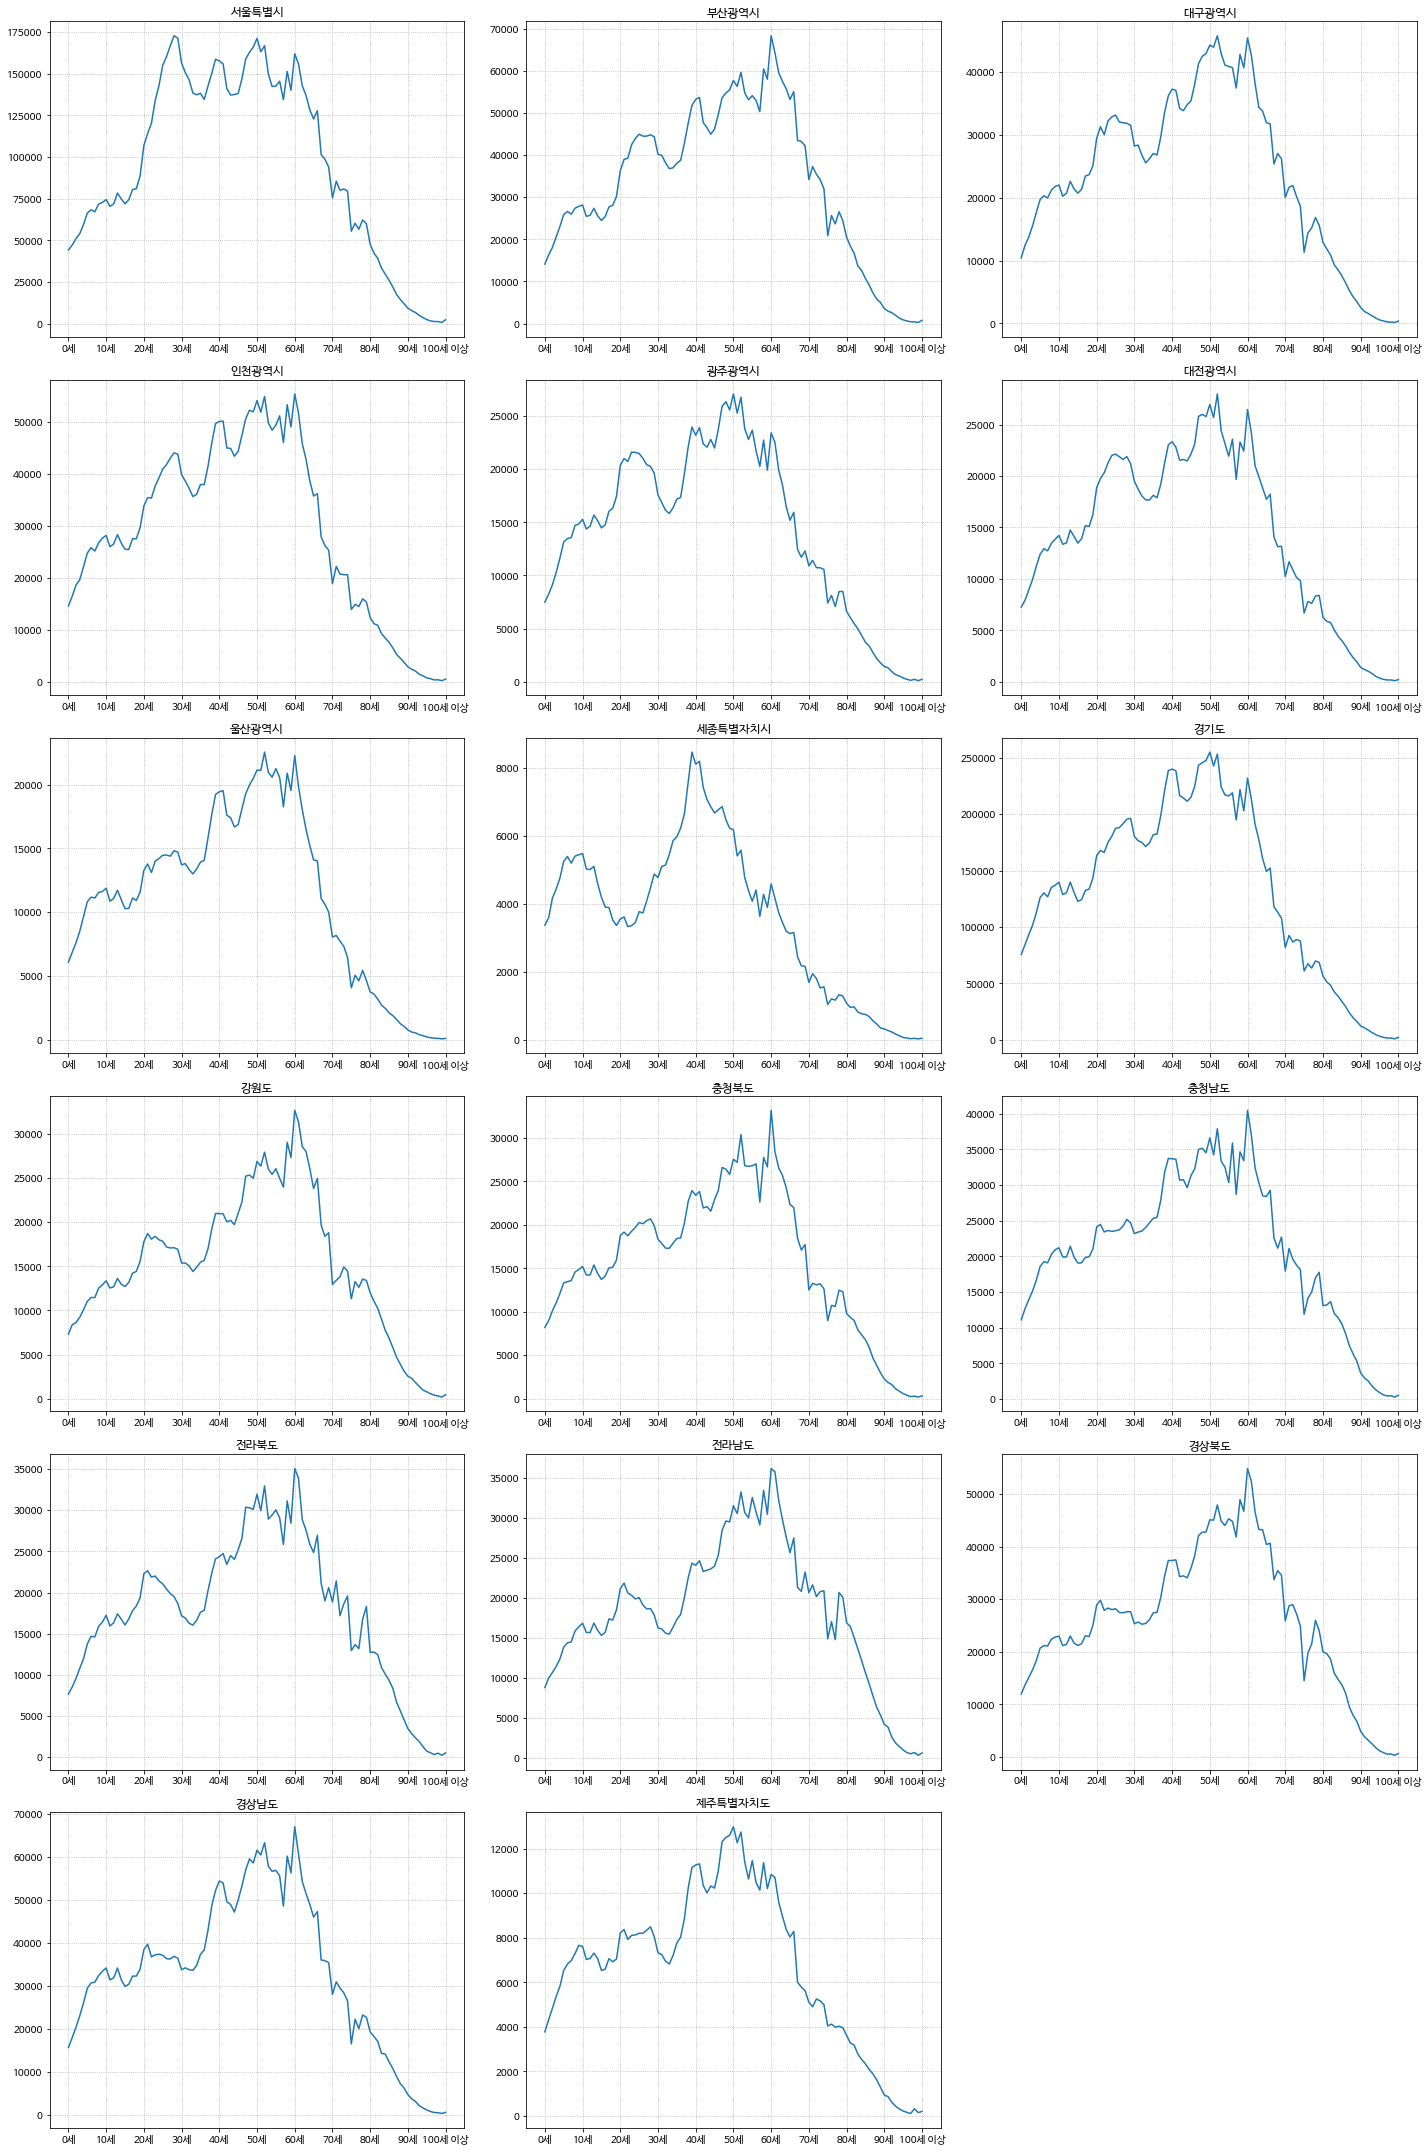

In [30]:
fig = plt.figure(figsize=(20,30))
for index in range(len(administrative_df)):
  plt.subplot(6,3,index+1)
  plt.plot(administrative_df.iloc[index])
  plt.xticks(range(0,101, 10))
  plt.title(administrative_df.index[index])
  plt.grid(ls=':')

fig.tight_layout()

##울시 구별 인구구조